# This is the Coursera capstone project

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
dfOriginal = pd.read_csv('Data-Collisions.csv')
dfOriginal.head()

C:\Users\carniato\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323,47.703,1,1307,1307,3502005,Matched,Intersection,37475.000,...,Wet,Daylight,NaN,nan,NaN,10,Entering at angle,0,0,N
1,1,-122.347,47.647,2,52200,52200,2607959,Matched,Block,nan,...,Wet,Dark - Street Lights On,NaN,6354039.000,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.335,47.608,3,26700,26700,1482393,Matched,Block,nan,...,Dry,Daylight,NaN,4323031.000,NaN,32,One parked--one moving,0,0,N
3,1,-122.335,47.605,4,1144,1144,3503937,Matched,Block,nan,...,Dry,Daylight,NaN,nan,NaN,23,From same direction - all others,0,0,N
4,2,-122.306,47.546,5,17700,17700,1807429,Matched,Intersection,34387.000,...,Wet,Daylight,NaN,4028032.000,NaN,10,Entering at angle,0,0,N


In [4]:
dfOriginal.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000,189339.000,189339.000,194673.000,194673.000,194673.000,65070.000,194673.000,194673.000,194673.000,194673.000,194673.000,194673.000,114936.000,194673.000,194673.000
mean,1.299,-122.331,47.620,108479.365,141091.456,141298.811,37558.451,1.299,2.444,0.037,0.028,1.921,13.868,7972521.337,269.401,9782.452
std,0.458,0.030,0.056,62649.723,86634.403,86986.542,51745.990,0.458,1.346,0.198,0.167,0.631,6.869,2553533.452,3315.776,72269.257
min,1.000,-122.419,47.496,1.000,1001.000,1001.000,23807.000,1.000,0.000,0.000,0.000,0.000,0.000,1007024.000,0.000,0.000
25%,1.000,-122.349,47.576,54267.000,70383.000,70383.000,28667.000,1.000,2.000,0.000,0.000,2.000,11.000,6040014.750,0.000,0.000
50%,1.000,-122.330,47.615,106912.000,123363.000,123363.000,29973.000,1.000,2.000,0.000,0.000,2.000,13.000,8023022.500,0.000,0.000
75%,2.000,-122.312,47.664,162272.000,203319.000,203459.000,33973.000,2.000,3.000,0.000,0.000,2.000,14.000,10155010.250,0.000,0.000
max,2.000,-122.239,47.734,219547.000,331454.000,332954.000,757580.000,2.000,81.000,6.000,2.000,12.000,69.000,13072024.000,525241.000,5239700.000


# Data cleaning

Inspect data first

In [5]:
def computeDetails(df): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    
    cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration']
    details = pd.concat([types, counts, distincts, nulls, missing_ration], axis = 1)
    details.columns = cols
    
    return details

In [6]:
details = computeDetails(dfOriginal)
print(details)

                  types  counts  distincts   nulls  missing ration
SEVERITYCODE      int64  194673          2       0           0.000
X               float64  189339      23564    5334           2.740
Y               float64  189339      23840    5334           2.740
OBJECTID          int64  194673     194673       0           0.000
INCKEY            int64  194673     194673       0           0.000
COLDETKEY         int64  194673     194673       0           0.000
REPORTNO         object  194673     194670       0           0.000
STATUS           object  194673          2       0           0.000
ADDRTYPE         object  192747          4    1926           0.989
INTKEY          float64   65070       7615  129603          66.575
LOCATION         object  191996      24103    2677           1.375
EXCEPTRSNCODE    object   84811          3  109862          56.434
EXCEPTRSNDESC    object    5638          2  189035          97.104
SEVERITYCODE.1    int64  194673          2       0           0

Remove columns with a ratio of missing values > 50%

In [7]:
df = dfOriginal.drop(['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'], axis=1)

In [8]:
details = computeDetails(df)
print(details)

                  types  counts  distincts  nulls  missing ration
SEVERITYCODE      int64  194673          2      0           0.000
X               float64  189339      23564   5334           2.740
Y               float64  189339      23840   5334           2.740
OBJECTID          int64  194673     194673      0           0.000
INCKEY            int64  194673     194673      0           0.000
COLDETKEY         int64  194673     194673      0           0.000
REPORTNO         object  194673     194670      0           0.000
STATUS           object  194673          2      0           0.000
ADDRTYPE         object  192747          4   1926           0.989
LOCATION         object  191996      24103   2677           1.375
SEVERITYCODE.1    int64  194673          2      0           0.000
SEVERITYDESC     object  194673          2      0           0.000
COLLISIONTYPE    object  189769         11   4904           2.519
PERSONCOUNT       int64  194673         47      0           0.000
PEDCOUNT  

Eliminate the columns that are semantically equal or similar to the target

In [9]:
print(df['SEVERITYCODE.1'].equals(df['SEVERITYCODE']))

True


In [10]:
df = df.drop(['SEVERITYCODE.1'], axis=1)

In [11]:
df = df.drop(['SEVERITYDESC'], axis=1)

Some fatures are administrative records, after the incided occoured

In [12]:
df = df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO','ST_COLCODE','ST_COLDESC','SDOTCOLNUM'], axis=1)
df = df.drop(['COLLISIONTYPE','SDOT_COLCODE','SDOT_COLDESC'], axis=1)
details = computeDetails(df)
print(details)

                types  counts  distincts  nulls  missing ration
SEVERITYCODE    int64  194673          2      0           0.000
X             float64  189339      23564   5334           2.740
Y             float64  189339      23840   5334           2.740
STATUS         object  194673          2      0           0.000
ADDRTYPE       object  192747          4   1926           0.989
LOCATION       object  191996      24103   2677           1.375
PERSONCOUNT     int64  194673         47      0           0.000
PEDCOUNT        int64  194673          7      0           0.000
PEDCYLCOUNT     int64  194673          3      0           0.000
VEHCOUNT        int64  194673         13      0           0.000
INCDATE        object  194673       5985      0           0.000
INCDTTM        object  194673     162058      0           0.000
JUNCTIONTYPE   object  188344          8   6329           3.251
UNDERINFL      object  189789          5   4884           2.509
WEATHER        object  189592         12

can we use location for missing X,Y and junction type?

In [13]:
original_length = len(df)
df_dropped = df.dropna()
print("percentage dropped ", (original_length-len(df_dropped))/len(df))

percentage dropped  0.0749307813615653


In [53]:
import datetime

def GetIndexses(df,col_missing_data,missingValue):
    if not missingValue :
        # nan
        indexses = df[col_missing_data].isnull()
    else:
        # comparables
        indexses = df[col_missing_data]==missingValue
        
    return indexses

def InputMissingData(df, col_missing_data, col_ref, missingValue = None):
    #group by nan or missing value
    invalid_idxs = GetIndexses(df, col_missing_data, missingValue)
    df_notval = df[invalid_idxs]
    df_notval = df_notval.groupby(col_ref).sum()  
    #print(df_notval[col_ref])
    #the valid entries
    df_val = df[~invalid_idxs]
    
    #now check the values of the reference column
    for r in df_notval.index.values:
        print(r)
        if isinstance(r, str) or isinstance(r, datetime.date):
            #a string (e.g. a location)
            df_loc = df_val[df_val[col_ref]==r]
        elif len(r)==2:
            #two doubles
            df_loc = df_val[(df_val[col_ref[0]]==r[0])& (df_val[col_ref[1]]==r[1])]
            
        if len(df_loc) > 0:
            val = df_loc[col_missing_data].iloc[0]
            if isinstance(r, str) or isinstance(r, datetime.date):
                #substitute with the first valid value
                df.loc[(df[col_ref]==r) & invalid_idxs,col_missing_data]=val
            elif len(r) ==2:
                df.loc[(df[col_ref[0]]==r[0]) &(df[col_ref[1]]==r[1]) & invalid_idxs, col_missing_data] = val
        
    return df        

In [36]:
#df = InputMissingData(df, 'X', 'LOCATION')
#df = InputMissingData(df, 'Y', 'LOCATION')
#df = InputMissingData(df, 'LOCATION', ['X','Y'])
#df = InputMissingData(df, 'JUNCTIONTYPE', 'LOCATION')
df = InputMissingData(df, 'JUNCTIONTYPE', ['X','Y'])

In [38]:
df_dropped = df.dropna()
print("percentage dropped ", (original_length-len(df_dropped))/len(df))

percentage dropped  0.055297858460084344


In [39]:
df.to_csv('Data-Collisions-cleaned.csv')

treat date and time 

Create train and test data

In [40]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
df = pd.read_csv('Data-Collisions-cleaned.csv')
df.dropna(inplace=True)
details = computeDetails(df)
print(details)

                types  counts  distincts  nulls  missing ration
Unnamed: 0      int64  183908     183908      0           0.000
SEVERITYCODE    int64  183908          2      0           0.000
X             float64  183908      23151      0           0.000
Y             float64  183908      23415      0           0.000
STATUS         object  183908          2      0           0.000
ADDRTYPE       object  183908          2      0           0.000
LOCATION       object  183908      23466      0           0.000
PERSONCOUNT     int64  183908         47      0           0.000
PEDCOUNT        int64  183908          7      0           0.000
PEDCYLCOUNT     int64  183908          3      0           0.000
VEHCOUNT        int64  183908         13      0           0.000
INCDATE        object  183908       5947      0           0.000
INCDTTM        object  183908     155627      0           0.000
JUNCTIONTYPE   object  183908          7      0           0.000
UNDERINFL      object  183908          4

# Treat the dates

In [42]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,Unnamed: 0,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,2,-122.323,47.703,Matched,Intersection,5TH AVE NE AND NE 103RD ST,2,0,0,...,2013/03/27 00:00:00+00,2013-03-27 14:54:00,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,N
1,1,1,-122.347,47.647,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,0,0,...,2006/12/20 00:00:00+00,2006-12-20 18:55:00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,N
2,2,1,-122.335,47.608,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,0,0,...,2004/11/18 00:00:00+00,2004-11-18 10:20:00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,N
3,3,1,-122.335,47.605,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,0,0,...,2013/03/29 00:00:00+00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,N
4,4,2,-122.306,47.546,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,0,0,...,2004/01/28 00:00:00+00,2004-01-28 08:04:00,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,N


In [43]:
df = df.drop(['INCDATE'], axis=1)

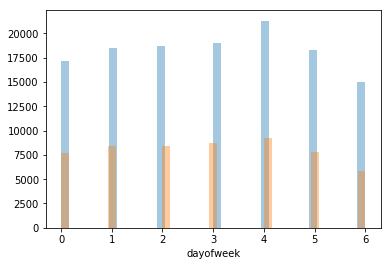

In [44]:
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df_selected = df[df['SEVERITYCODE']==1]
sns.distplot(df_selected['dayofweek'],kde = False)
df_selected = df[df['SEVERITYCODE']==2]
sns.distplot(df_selected['dayofweek'],kde = False)

It seems there are more incident on day 4 and less at day 3

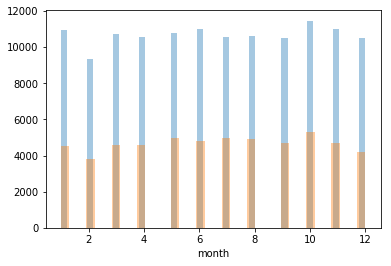

In [45]:
df['month'] = df['INCDTTM'].dt.month
df_selected = df[df['SEVERITYCODE']==1]
sns.distplot(df_selected['month'],kde = False)
df_selected = df[df['SEVERITYCODE']==2]
sns.distplot(df_selected['month'],kde = False)

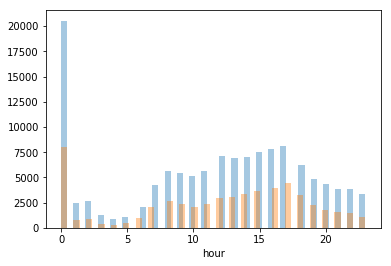

In [46]:
df['hour'] = df['INCDTTM'].dt.hour
df_selected = df[df['SEVERITYCODE']==1]
sns.distplot(df_selected['hour'],kde = False)
df_selected = df[df['SEVERITYCODE']==2]
sns.distplot(df_selected['hour'],kde = False)

In [47]:
df_selected = df[['INCDTTM','hour','LIGHTCOND']]
df_selected = df_selected[df_selected['hour']==0]
df_selected.head(20)

,INCDTTM,hour,LIGHTCOND
6,2008-12-09 00:00:00,0,Daylight
16,2005-07-01 00:00:00,0,Daylight
19,2009-06-01 00:00:00,0,Unknown
30,2005-11-05 00:00:00,0,Dark - Street Lights On
40,2006-08-05 00:00:00,0,Daylight
55,2006-04-01 00:00:00,0,Dark - Street Lights On
68,2006-06-06 00:00:00,0,Dark - Street Lights On
86,2019-07-05 00:32:00,0,Dark - Street Lights On
91,2006-08-08 00:00:00,0,Daylight
94,2005-03-04 00:00:00,0,Dark - Street Lights On


In [54]:
df = InputMissingData(df, 'LIGHTCOND', 'INCDTTM','Unknown')

2004-01-01T00:00:00.000000000


TypeError: object of type 'numpy.datetime64' has no len()

feature selection

In [ ]:
y = df['SEVERITYCODE']
X = df.drop(['SEVERITYCODE'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#https://machinelearningmastery.com/feature-selection-with-categorical-data/
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from scipy.stats import chi2_contingency 
df_chi_sq= pd.concat([X_train, y_train],axis=1)

for c in X.columns.values:
    if df[c].dtype=="object":
        print("Chi squared for ", c)
        df_chi_sq_sel = df_chi_sq[[c,'SEVERITYCODE']]
        df_chi_sq_sel = df_chi_sq_sel.dropna()
        # apply ordinal encoding
        oe = OrdinalEncoder()
        #oe.fit(df_chi_sq_sel)
        #df_chi_sq_sel = np.array(oe.transform(df_chi_sq_sel))
        #print(df_chi_sq_sel.shape)
        #perform chi squared
        #table = np.array([list(df_chi_sq_sel[:,0]), list(df_chi_sq_sel[:,1])])
        #stat, p, dof, expected = chi2_contingency(df_chi_sq_sel) 
        
        #alpha = 0.05
        #print("p value is " + str(p)) 
        #if p <= alpha:
        #    print('Dependent (reject H0)')
        #else:
        #    print('Independent (H0 holds true)') 
        
        
        
    